In [7]:
##Importing the libraries

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

##Open the dataset

df = pd.read_csv("./Group-project-DataScience-GroupD.csv", sep=";") #Passing the path and the right separator

df #Displaying the dataset to ensure proper opening

##First, we are going to print the dimensions of our dataset

print(f"The number of row of the dataset is: {df.shape[0]}") 
print(f"The number of columns of the dataset is: {df.shape[1]}")

print("The number of rows and columns of the dataset is coherent with our excel, highlighting proper opening and reading of the file")



The number of row of the dataset is: 1345
The number of columns of the dataset is: 9
The number of rows and columns of the dataset is coherent with our excel, highlighting proper opening and reading of the file


In [8]:
##After opening the dataset, we are going to do a check on the variable type

print("The types of the variables are:\n")

print(df.info())

The types of the variables are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Date                                1345 non-null   object
 1   M2 Money Supply (Bn)                1345 non-null   object
 2   S&P 500 Index                       1345 non-null   object
 3   US Dollar Index                     1345 non-null   object
 4   Federal Funds Effective Rate (DFF)  1345 non-null   object
 5   Gold Futures                        1345 non-null   object
 6   Crude Oil Futures                   1345 non-null   object
 7   BTC/USD Index                       795 non-null    object
 8   CBOE Volatility Index (VIX)         1345 non-null   object
dtypes: object(9)
memory usage: 94.7+ KB
None


In [9]:
## To put in the report:
## After displaying the variables type, we realised that they were all read as objects by python. When variables are read as string, it will be more
## complicated to do mathematical operations on them. In order to overcome this issue, all variables were transformed as float and the date was
## transformed as a datetime type.
## Moreover, to better execute operations, we did the following modification:
## - Elimination of '$'
## - Elimination of '%'
## - Replacement of the comma (used as decimal separator) with a period

In [10]:
colswithdoll = ['M2 Money Supply (Bn)', 'S&P 500 Index', 'US Dollar Index', 'Gold Futures',
             'Crude Oil Futures', 'BTC/USD Index', 'CBOE Volatility Index (VIX)']
colwithper = ['Federal Funds Effective Rate (DFF)']

df[colswithdoll] = df[colswithdoll].apply(lambda x: x.str.replace('$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

df[colwithper] = df[colwithper].apply(lambda s: s.str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
    / 100
)

df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [11]:
## Let's try to print the new type:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                1345 non-null   datetime64[ns]
 1   M2 Money Supply (Bn)                1345 non-null   float64       
 2   S&P 500 Index                       1345 non-null   float64       
 3   US Dollar Index                     1345 non-null   float64       
 4   Federal Funds Effective Rate (DFF)  1345 non-null   float64       
 5   Gold Futures                        1345 non-null   float64       
 6   Crude Oil Futures                   1345 non-null   float64       
 7   BTC/USD Index                       795 non-null    float64       
 8   CBOE Volatility Index (VIX)         1345 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 94.7 KB
None


In [12]:
## Let's try to see if all the modifications have been done

display(df.head())

,Date,M2 Money Supply (Bn),S&P 500 Index,US Dollar Index,Federal Funds Effective Rate (DFF),Gold Futures,Crude Oil Futures,BTC/USD Index,CBOE Volatility Index (VIX)
0,2025-10-05,22243.7,6552.51,98.98,0.0409,4000.4,58.90,110671.5,21.66
1,2025-09-28,22092.7,6715.79,97.72,0.0409,3908.9,60.88,122387.1,16.65
2,2025-09-21,22082.5,6643.70,98.15,0.0419,3793.9,65.14,109652.8,15.29
3,2025-09-14,22197.4,6664.36,97.64,0.0433,3692.4,62.68,115699.2,15.45
4,2025-09-07,22159.7,6584.29,97.55,0.0433,3673.3,62.69,115924.9,14.76


In [13]:
## All the data has been correctly modified

In [14]:
#Let's do some cleaning now

df.isna().sum().sort_values(ascending = False)

BTC/USD Index                         550
Date                                    0
M2 Money Supply (Bn)                    0
US Dollar Index                         0
S&P 500 Index                           0
Federal Funds Effective Rate (DFF)      0
Gold Futures                            0
Crude Oil Futures                       0
CBOE Volatility Index (VIX)             0
dtype: int64

In [15]:
## To put in the report:
## We can see that our dataset contains 550 missing values for the "BTC/USD Index". This is an issue that we were totally
## expecting, as bitcoin has been created after 2010. In order to maintain the original dimension of our dataset, to handle
## those missing values we are going to replace them with zero, instead of dropping all the rows

df['BTC/USD Index'] = df['BTC/USD Index'].fillna(0)

## Let's do a check to ensure a proper replacement of the values

display(df.tail())

,Date,M2 Money Supply (Bn),S&P 500 Index,US Dollar Index,Federal Funds Effective Rate (DFF),Gold Futures,Crude Oil Futures,BTC/USD Index,CBOE Volatility Index (VIX)
1340,2000-01-30,4636.2,1424.4,104.29,0.0555,313.0,28.82,0.0,21.54
1341,2000-01-23,4653.4,1360.2,104.48,0.0548,286.0,27.22,0.0,26.14
1342,2000-01-16,4689.6,1441.4,101.76,0.0560,289.7,28.20,0.0,20.82
1343,2000-01-09,4700.6,1465.2,101.72,0.0551,284.9,28.02,0.0,19.66
1344,2000-01-02,4698.8,1441.5,100.80,0.0452,282.9,24.22,0.0,21.72


In [16]:
## The NaN values have been correctly replaced by zeros

In [25]:
## (To integrate with nick's charts)

## Let's do some EDA

## Let's first import the libraries

import matplotlib.pyplot as plt
import seaborn as sns

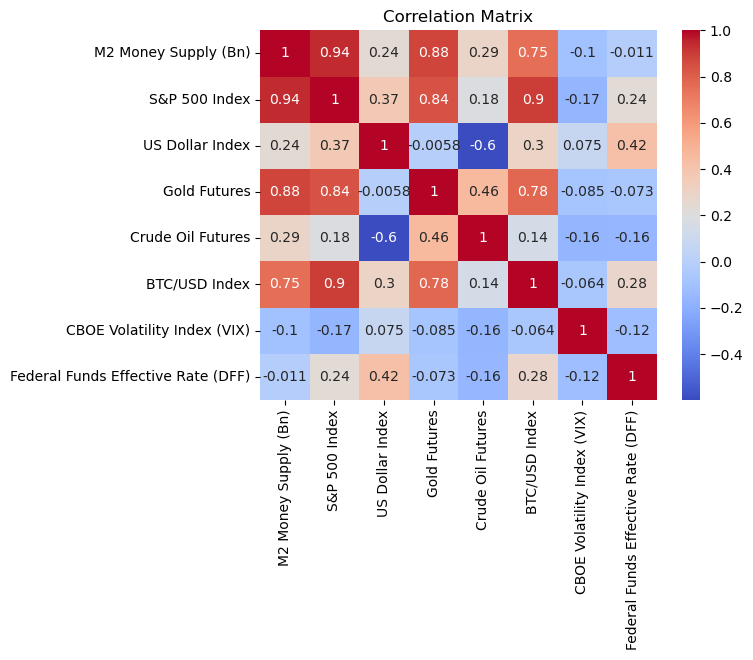

In [39]:
## Firstly, we are going to give a look at the correlation matrix to see if there is some correlation between the variables of our dataset
## We are not going to consider the date, as we are going to do some time series graphs in a second time

num_cols =  ["M2 Money Supply (Bn)", "S&P 500 Index", "US Dollar Index", "Gold Futures",
             "Crude Oil Futures", "BTC/USD Index", "CBOE Volatility Index (VIX)", "Federal Funds Effective Rate (DFF)"]

sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
## Now, let's plot some qq plots to understand if our variables follow a normal distribution

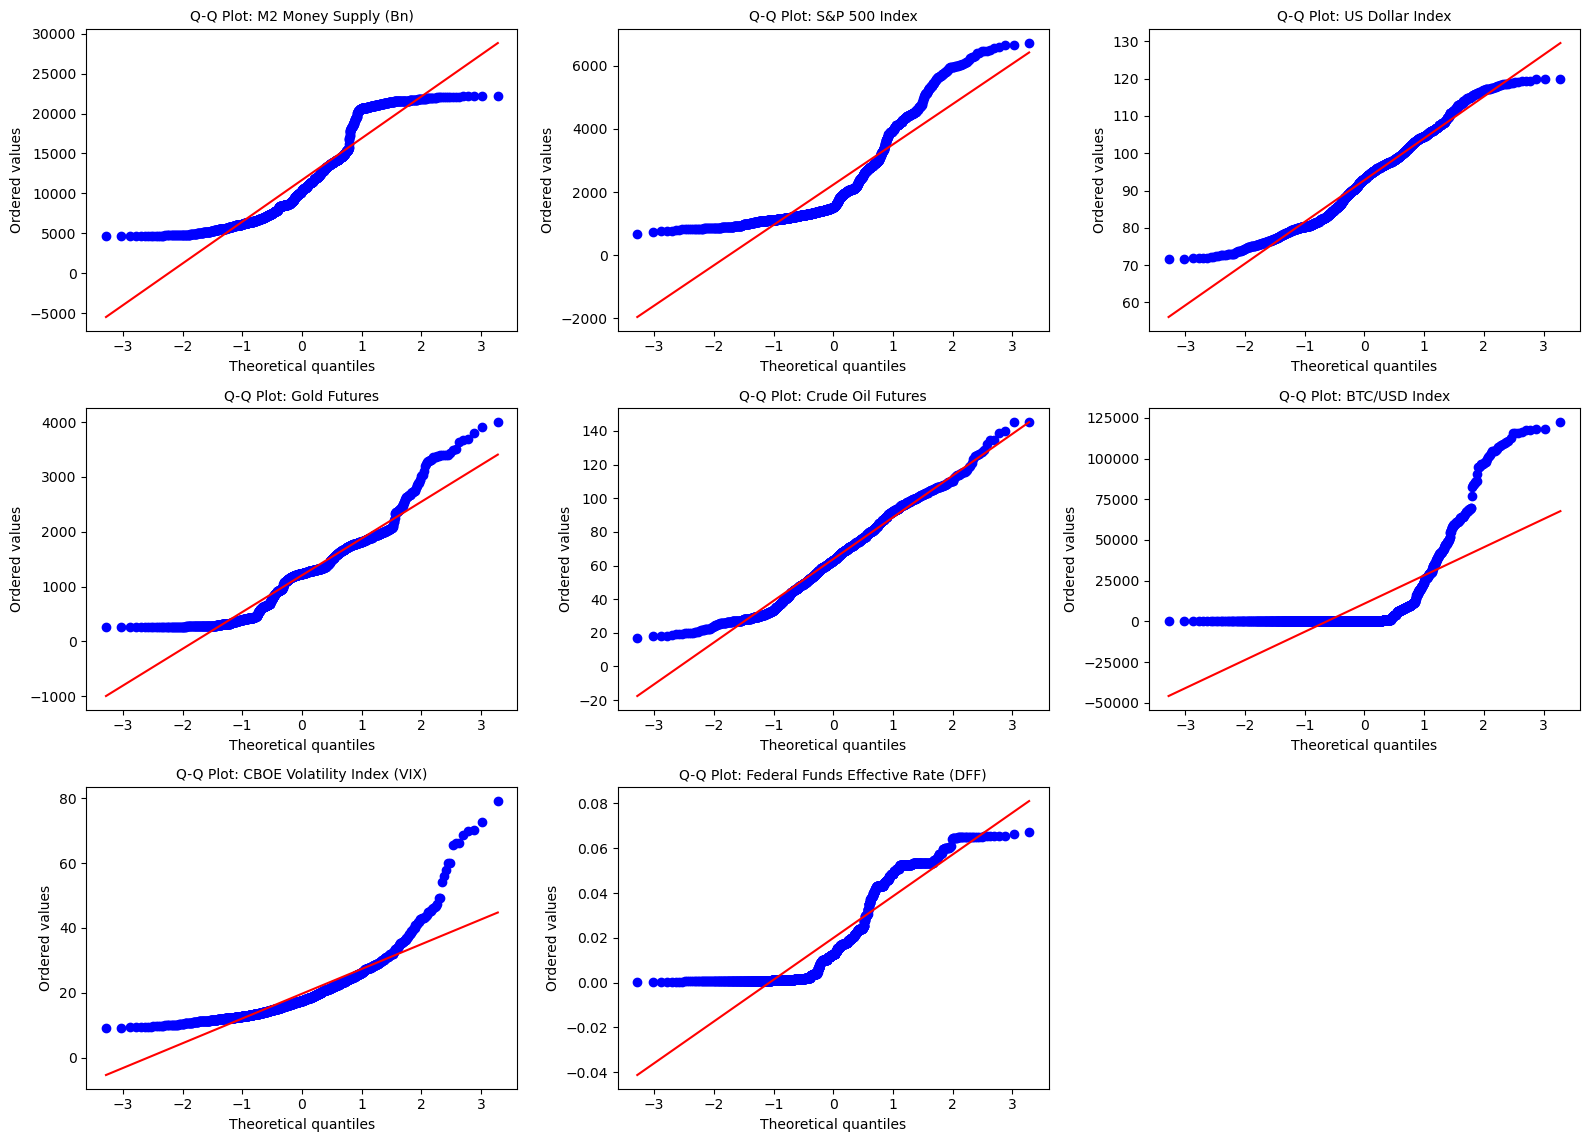

In [37]:
from scipy import stats
import math

num_variables = len(num_cols)
cols_per_row = 3 
rows = math.ceil(num_variables / cols_per_row)

# Creating the tab for visualisation

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows))
axes = axes.flatten()

## Plot

for i, col in enumerate(num_cols):
    ax = axes[i] 
    stats.probplot(df[col], dist="norm", plot=ax)
    ax.set_title(f"Q-Q Plot: {col}", fontsize=10)
    ax.set_xlabel("Theoretical quantiles")
    ax.set_ylabel("Ordered values")
    
for j in range(num_variables, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()